In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

## Question 1 Solution

In [53]:
# read the optdigits data
data_train = np.genfromtxt('/content/drive/MyDrive/data/optdigits.tra', 
                           delimiter=',')
data_test = np.genfromtxt('/content/drive/MyDrive/data/optdigits.tes', 
                          delimiter=',')
print("Training Data:\n", data_train)
print("\n\nTest Data:\n", data_test)

Training Data:
 [[ 0.  1.  6. ...  0.  0.  0.]
 [ 0.  0. 10. ...  0.  0.  0.]
 [ 0.  0.  8. ...  0.  0.  7.]
 ...
 [ 0.  0.  3. ...  0.  0.  6.]
 [ 0.  0.  6. ...  5.  0.  6.]
 [ 0.  0.  2. ...  0.  0.  7.]]


Test Data:
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  1.]
 [ 0.  0.  0. ...  9.  0.  2.]
 ...
 [ 0.  0.  1. ...  0.  0.  8.]
 [ 0.  0.  2. ...  0.  0.  9.]
 [ 0.  0. 10. ...  1.  0.  8.]]


In [3]:
# split the data as X_train, X_test, y_train, y_test
X_train = data_train[:, :-1]
y_train = data_train[:, -1]
y_train = y_train.astype('int64')
X_test = data_test[:, :-1]
y_test = data_test[:, -1]
y_test = y_test.astype('int64')

In [55]:
# implement multivariate gaussian kernel with mahalanobis distance

def gaussian_kernel(test_x, train_x, train_y):
    """train_y arguments can be given as list or numpy array objects while
     train_x, train_y arguments have to be given as numpy array only."""
    
    # calculation of training data covariance matrix:
    S = (train_x - np.mean(train_x, axis=0)).T @ \
        (train_x - np.mean(train_x, axis=0)) / len(train_x)

    # take the inverse of the covariance matrix to be used in calculation of K's
    # in order speed-up the algorithm
    S_inverse = np.linalg.pinv(S)

    preds = []
    for j in range(len(test_x)): # loop over the samples of test_x
        g = []
        for i in range(len(train_x)): # loop over the samples of train_x

            # calculate the discriminants. Note that in the equation of K
            # determinant of covariance matrix is equal to zero so, it is 
            # omitted. Also in the calculation of discriminant the common factor
            # 1/(Nhd) is ignored.
            K = 1 / ( ((2 * np.pi)**(len(train_x[i]) / 2)) ) * np.exp( (-0.5) \
                * ((test_x[j] - train_x[i]).T.dot(S_inverse)).dot((test_x[j] \
                                                                - train_x[i])) )
            g.append(K)
        # predict the test sample label based on the index of maximum 
        # discriminant
        preds.append(train_y[np.argmax(g)]) 
    return preds # return the predicted labels for given test samples.

## Question 2 Solution

In [56]:
def accuracy_calc(actual, predicted):
    """Accuracy calculation function"""
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    
    return correct / float(len(actual)) * 100

In [57]:
# Make predictions for optdigits data by using multivariate gaussian kernel with
# mahalanobis distance
predictions = gaussian_kernel(X_test, X_train, y_train)
accuracy = accuracy_calc(y_test, predictions)
print('Accuracy: %.2f%%' % accuracy)

Accuracy: 92.93%


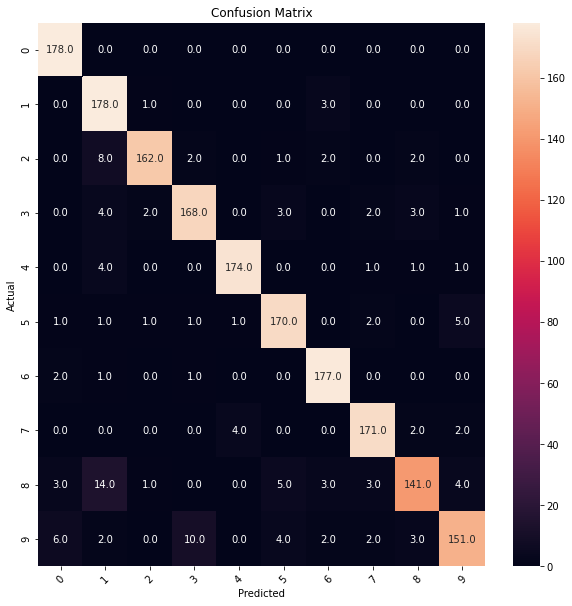

In [58]:
# Confusion Matrix
cm = confusion_matrix(y_test, predictions, labels=np.unique(y_test))
plt.figure(figsize=(10, 10))
plt.title('Confusion Matrix')
sns.heatmap(cm,annot=True, fmt=".1f")
plt.xlabel('Predicted')
plt.xticks(rotation=45)
plt.ylabel('Actual')
plt.ioff()
plt.show()

## Question 3 Solution

In [63]:
def smoothed_gaussian_kernel(test_x, train_x, train_y, k):
    """train_y arguments can be given as list or numpy array objects while
     train_x, train_y arguments have to be given as numpy array only. Number of
     neighbors k must be given as an integer."""
    
    # calculation of training data covariance matrix:
    S = (train_x - np.mean(train_x, axis=0)).T @ \
        (train_x - np.mean(train_x, axis=0)) / len(train_x)

    # take the inverse of the covariance matrix to be used in calculation of K's
    # in order speed-up the algorithm
    S_inverse = np.linalg.pinv(S)

    preds = []
    for j in range(len(test_x)): # loop over the samples of test_x
        g = []
        for i in range(len(train_x)): # loop over the samples of train_x

            # calculate the discriminants. Note that in the equation of K
            # determinant of covariance matrix is equal to zero so, it is 
            # omitted. Also in the calculation of discriminant the common factor
            # 1/(Nhd) is ignored.
            K = 1 / ( ((2 * np.pi)**(len(train_x[i]) / 2)) ) * np.exp( (-0.5) \
                * ((test_x[j] - train_x[i]).T.dot(S_inverse)).dot((test_x[j] \
                                                                - train_x[i])) )
            g.append(K)
        g = np.array(g)
        idx = (-g).argsort()[:k] # get the indices of k maximum discriminants

        # get labels of k maximum discriminants using the indices
        predictions = train_y[idx] 
        # make a prediction based on the average value of found labels
        preds.append(np.mean(predictions)) 
    return preds # return the prediction

## Question 4 Solution

In [60]:
# Read wineqaulity data
df = pd.read_csv("/content/drive/MyDrive/data/winequality-red.csv", 
                 delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [61]:
# 1599 samples, 11 features
df.shape

(1599, 12)

In [9]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [28]:
# data is randomly splitted as approximately for 70% training and 30% testing.

df = df.sample(frac=1) # shuffle rows of dataframe 
train_data = df.iloc[:1120, :]
test_data = df.iloc[1120:, :]
train_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1147,10.0,0.410,0.45,6.2,0.071,6.0,14.0,0.99702,3.21,0.49,11.8,7
267,7.9,0.350,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,8
216,8.7,0.625,0.16,2.0,0.101,13.0,49.0,0.99620,3.14,0.57,11.0,5
1486,6.8,0.680,0.21,2.1,0.070,9.0,23.0,0.99546,3.38,0.60,10.3,5
215,7.0,0.490,0.49,5.6,0.060,26.0,121.0,0.99740,3.34,0.76,10.5,5


In [29]:
def split_to_folds(dataset, n_folds):
    """"This function splits the data into n_folds."""
    # dataset argument must be given as numpy array and n_folds as integer.
    from random import randrange
    dataset_split = []
    dataset_copy = list(dataset)
    fold_size = len(dataset) / n_folds
    for i in range(n_folds):
        fold = []
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

In [64]:
def cross_validation(dataset, n_folds, k):
    """"This function first uses split_to_folds function to split the data into
    given number of folds. Later at each step one of the folds is taken as test
    set and the others as training sets and mean absolute error is calculated.
    """
    folds = split_to_folds(dataset, n_folds)
    errors = []
    for i in range(len(folds)):
        train_set = folds.copy()
        train_set.pop(i)
        train_set = sum(train_set, [])
        test_set = []
        for row in folds[i]:
            row_copy = list(row)
            test_set.append(row_copy)

        # make predictions using smoothed multivariate guassian kernel with
        # mahallanobis distances
        preds = smoothed_gaussian_kernel(np.array(test_set)[:, :-1], 
                                         np.array(train_set)[:, :-1], 
                                         np.array(train_set)[:, -1], k)
        
        # calculate the mean absolute error
        mean_abs_error = sum(np.abs(np.array(test_set)[:, -1] - preds)) /\
         len(np.array(test_set)[:, -1])
        errors.append(mean_abs_error) # append the errors to errors list
    return errors # return the list of mean absolute errors.

# number of neighbors is taken as 3
errors = cross_validation(train_data.values, 5, k=3) 
errors
# Mean absolute error for each folds is given in the output.

[0.5848214285714287,
 0.5684523809523807,
 0.5282738095238094,
 0.5193452380952384,
 0.4732142857142856]

## Question 5 Solution

In [77]:
error_list = np.zeros((10, 20, 5))
# 10--> number of k's, 20--> number of seeds, 
# 5-->mean absolute error for each fold

k_list = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512] 
for j in range(20): # loop for 20 times 
    for i in range(len(k_list)): # loop for the number of elements in k_list

        # calculate the mean absolute error of each fold for selected number 
        # of neighbors
        errors = cross_validation(train_data.values, 5, k_list[i])

        #  save absolute errors to error_list
        error_list[i, j] = np.array(errors)

In [85]:
# calculate the average absolute mean error for each used k in the algorithm
average_errors = []
standard_devs = []
for i in range(len(k_list)):
    average_errors.append(np.mean(error_list[i]))
    standard_devs.append(np.std(error_list[i]))

<Figure size 720x720 with 0 Axes>

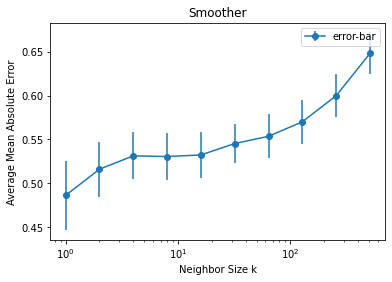

<Figure size 720x720 with 0 Axes>

In [93]:
plt.errorbar(k_list, average_errors, yerr=standard_devs, fmt='-o');
plt.xlabel("Neighbor Size k")
plt.ylabel("Average Mean Absolute Error")
plt.title("Smoother")
plt.legend(["error-bar"])
plt.xscale('log')
plt.figure(figsize=(10, 10))

When k is equal to 1 it gives the lowest mean absolute error. So for the test data we use k=1.

In [97]:
# k is selected as 1 in for the test data:
preds = smoothed_gaussian_kernel(test_data.values[:, :-1], 
                    train_data.values[:, :-1], train_data.values[:, -1], k=1)
mean_abs_error = sum(test_data.values[:, -1] - preds) / \
                                                len(test_data.values[:, -1])
mean_abs_error

0.014613778705636743